# Part 1
## GOAL 
- find objects in an image using Template Matching

We need a template image. For a test, I take a capture of the fish as a template. 

For my code, I use this http://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html

In [88]:
import imread
import os 
from scipy import ndimage

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

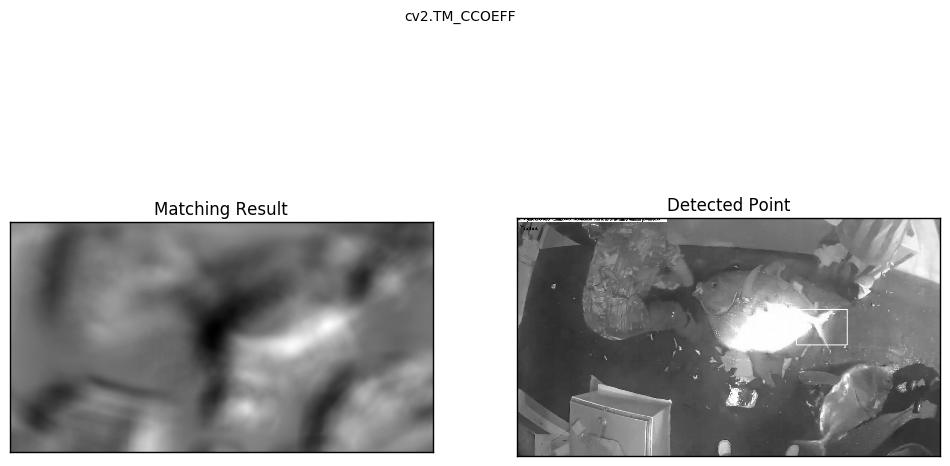

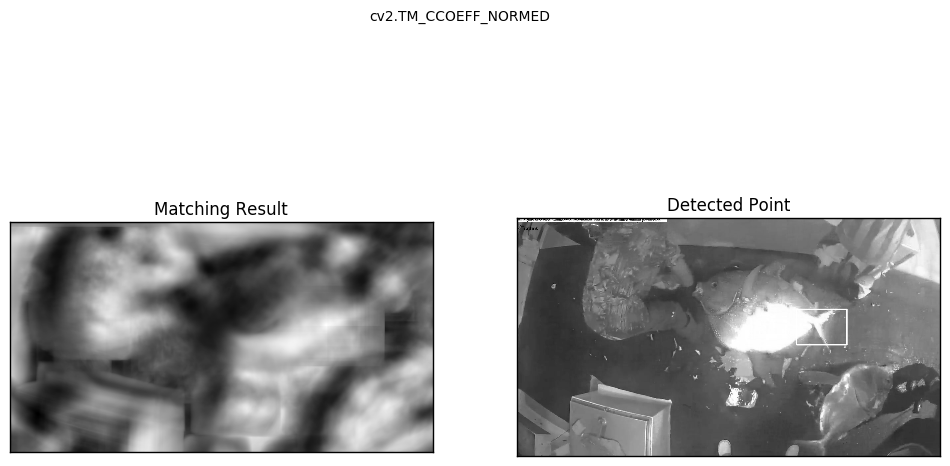

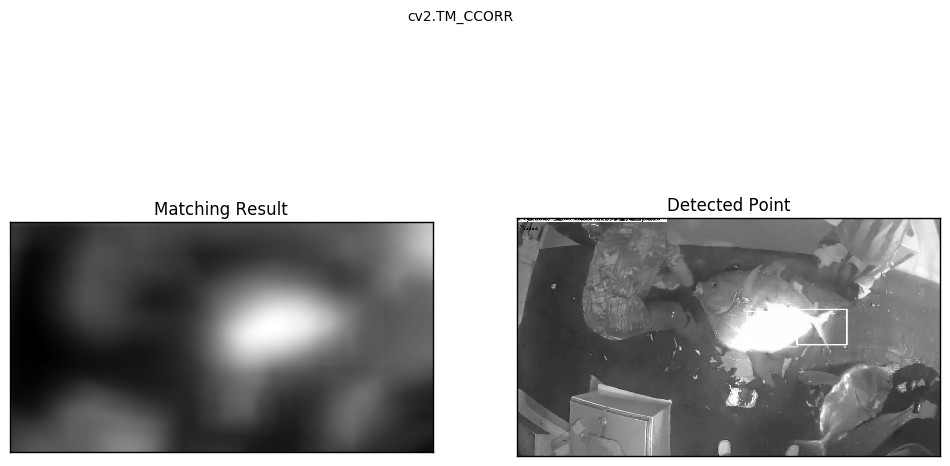

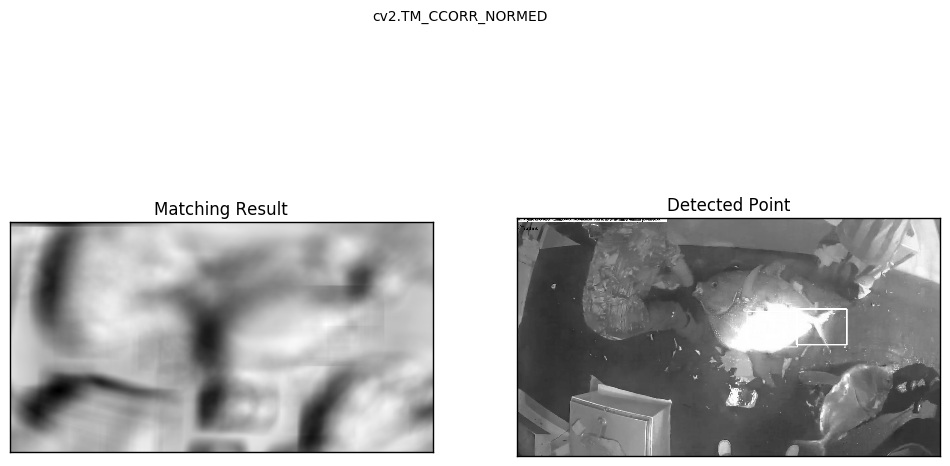

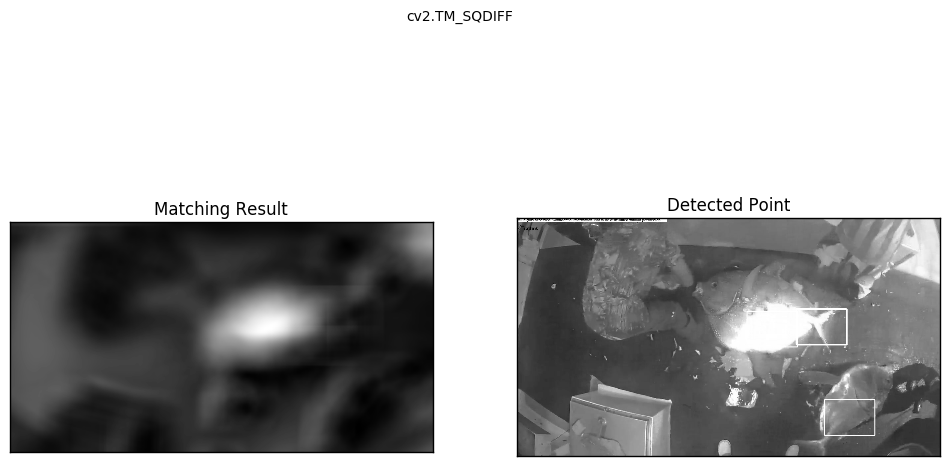

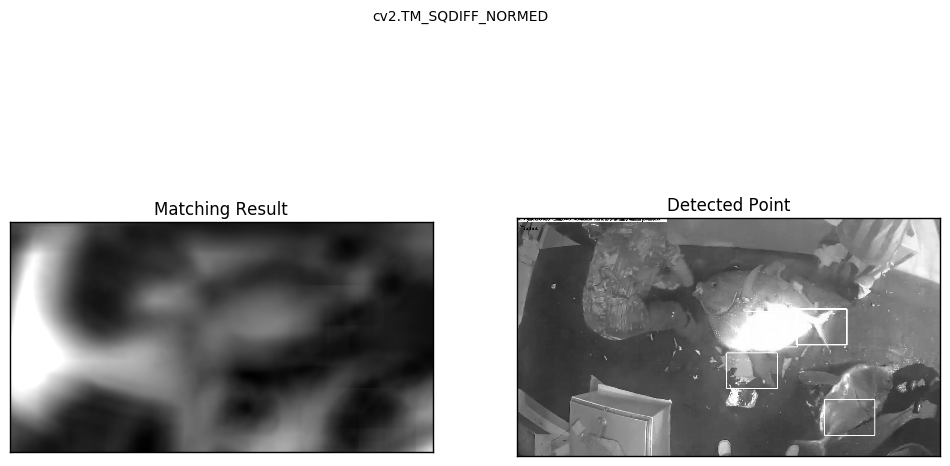

In [113]:
os.chdir('/Users/HUGO/Desktop')
#display(Image(filename="img_00176.jpg"))

img = cv2.imread('img_02758.jpg',0) # img_00176,img_02758
img2 = img
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
 
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

## Remark : 

All of them (methods) detect the template in the image. Sometime, we can detect some other part in the image. 


# Part 2

Pick up the top left on an image. For exemple a square of 500 $\times$ 500 $\times$ 3

In [103]:
img_rows, img_cols, img_rgb = 500, 500, 3
im_array = cv2.imread('img_00176.jpg')
X = np.zeros([ img_rows, img_cols, img_rgb])
X[:, :, :] = im_array[:500,:500,:].astype('float32')
X /= 255.


(<matplotlib.axes._subplots.AxesSubplot at 0x1096eab90>,
 <matplotlib.image.AxesImage at 0x1075fa050>)

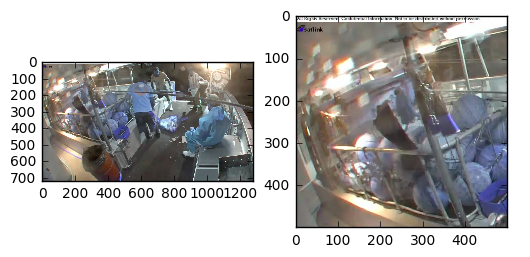

In [111]:
plt.subplot(121), plt.imshow(im_array)
plt.subplot(122), plt.imshow(X) 

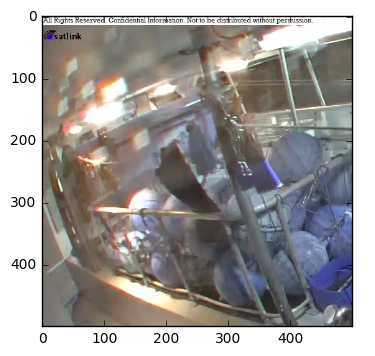